In [9]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # pyright: ignore[reportMissingImports]
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img  # pyright: ignore[reportMissingImports]

In [1]:

!pip install -q kaggle
# You can get this from Kaggle > Account > API > Create New API Token
# make sure to generate legacy api token
from google.colab import files
if not os.path.exists('/root/.kaggle/kaggle.json'):
    print("Please upload your kaggle.json file:")
    files.upload()
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the GTSRB dataset
if not os.path.exists('gtsrb_data'):
    !kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
    !unzip -q gtsrb-german-traffic-sign.zip -d gtsrb_data
    print("Dataset downloaded and unzipped.")

cur_path = 'gtsrb_data'

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 85% 519M/612M [00:03<00:01, 81.5MB/s]
100% 612M/612M [00:03<00:00, 197MB/s] 
Dataset downloaded and unzipped.


In [7]:
!ls gtsrb_data

meta  Meta  Meta.csv  test  Test  Test.csv  train  Train  Train.csv


In [10]:
data = []
labels = []
classes = 43

#Retrieving the images and their labels
for i in range(classes):
    # Construct path for each class folder (e.g., .../Minor2/Train/0)
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            # Use os.path.join for platform-independent path
            image_path = os.path.join(path, a)
            image = Image.open(image_path)
            image = image.resize((30,30))
            image = np.array(image)

            data.append([image,i]) #appending all value together
        except:
            print(f"Error loading image: {image_path}") # Added image_path to error message for debugging

In [11]:
random.shuffle(data)

In [12]:
#to check if all the images are processed
print(len(data))

39209


In [13]:
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

In [14]:
#Converting lists into numpy arrays
x = np.array(x)
y = np.array(y)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Normalizing the training np arrays

X_train = X_train/255.0
X_val = X_val/255.0

In [17]:
print("Shape of train images is:", X_train.shape)
print("Shape of labels is:", y_train.shape)

Shape of train images is: (31367, 30, 30, 3)
Shape of labels is: (31367,)


In [18]:
#Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(30, 30, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=(X_val, y_val))

model.save('my_model2.h5')  # always save your weights after training or during training

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 105s 104ms/step - accuracy: 0.1698 - loss: 3.0338 - val_accuracy: 0.5103 - val_loss: 1.4235
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 93s 95ms/step - accuracy: 0.5120 - loss: 1.4808 - val_accuracy: 0.8175 - val_loss: 0.5584
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 96s 98ms/step - accuracy: 0.7157 - loss: 0.8387 - val_accuracy: 0.9041 - val_loss: 0.3219
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 99s 101ms/step - accuracy: 0.8199 - loss: 0.5446 - val_accuracy: 0.9568 - val_loss: 0.1489
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 92s 93ms/step - accuracy: 0.8677 - loss: 0.4092 - val_accuracy: 0.9598 - val_loss: 0.1312
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 141s 93ms/step - accuracy: 0.9027 - loss: 0.3015 - val_accuracy: 0.9819 - val_loss: 0.0702
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 92s 94ms/step - accuracy: 0.9216 - loss: 0.2444 - val_accuracy: 0.9839 - val_loss: 0.0562
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 92s 94ms/step - accuracy: 0.9367 - loss: 0.2043 - val_acc

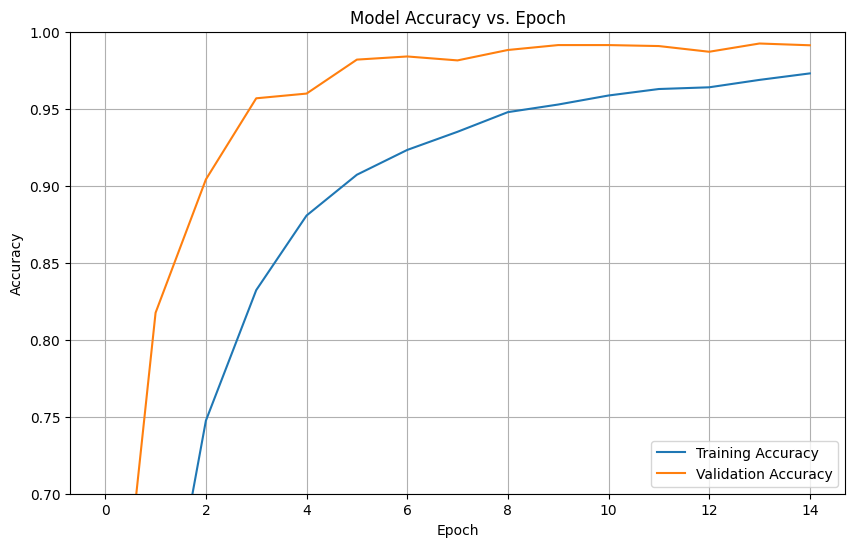

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Model Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('accuracy_vs_epoch.png') # Save the plot image
plt.show()

395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step
Overall Test Accuracy: 0.9522


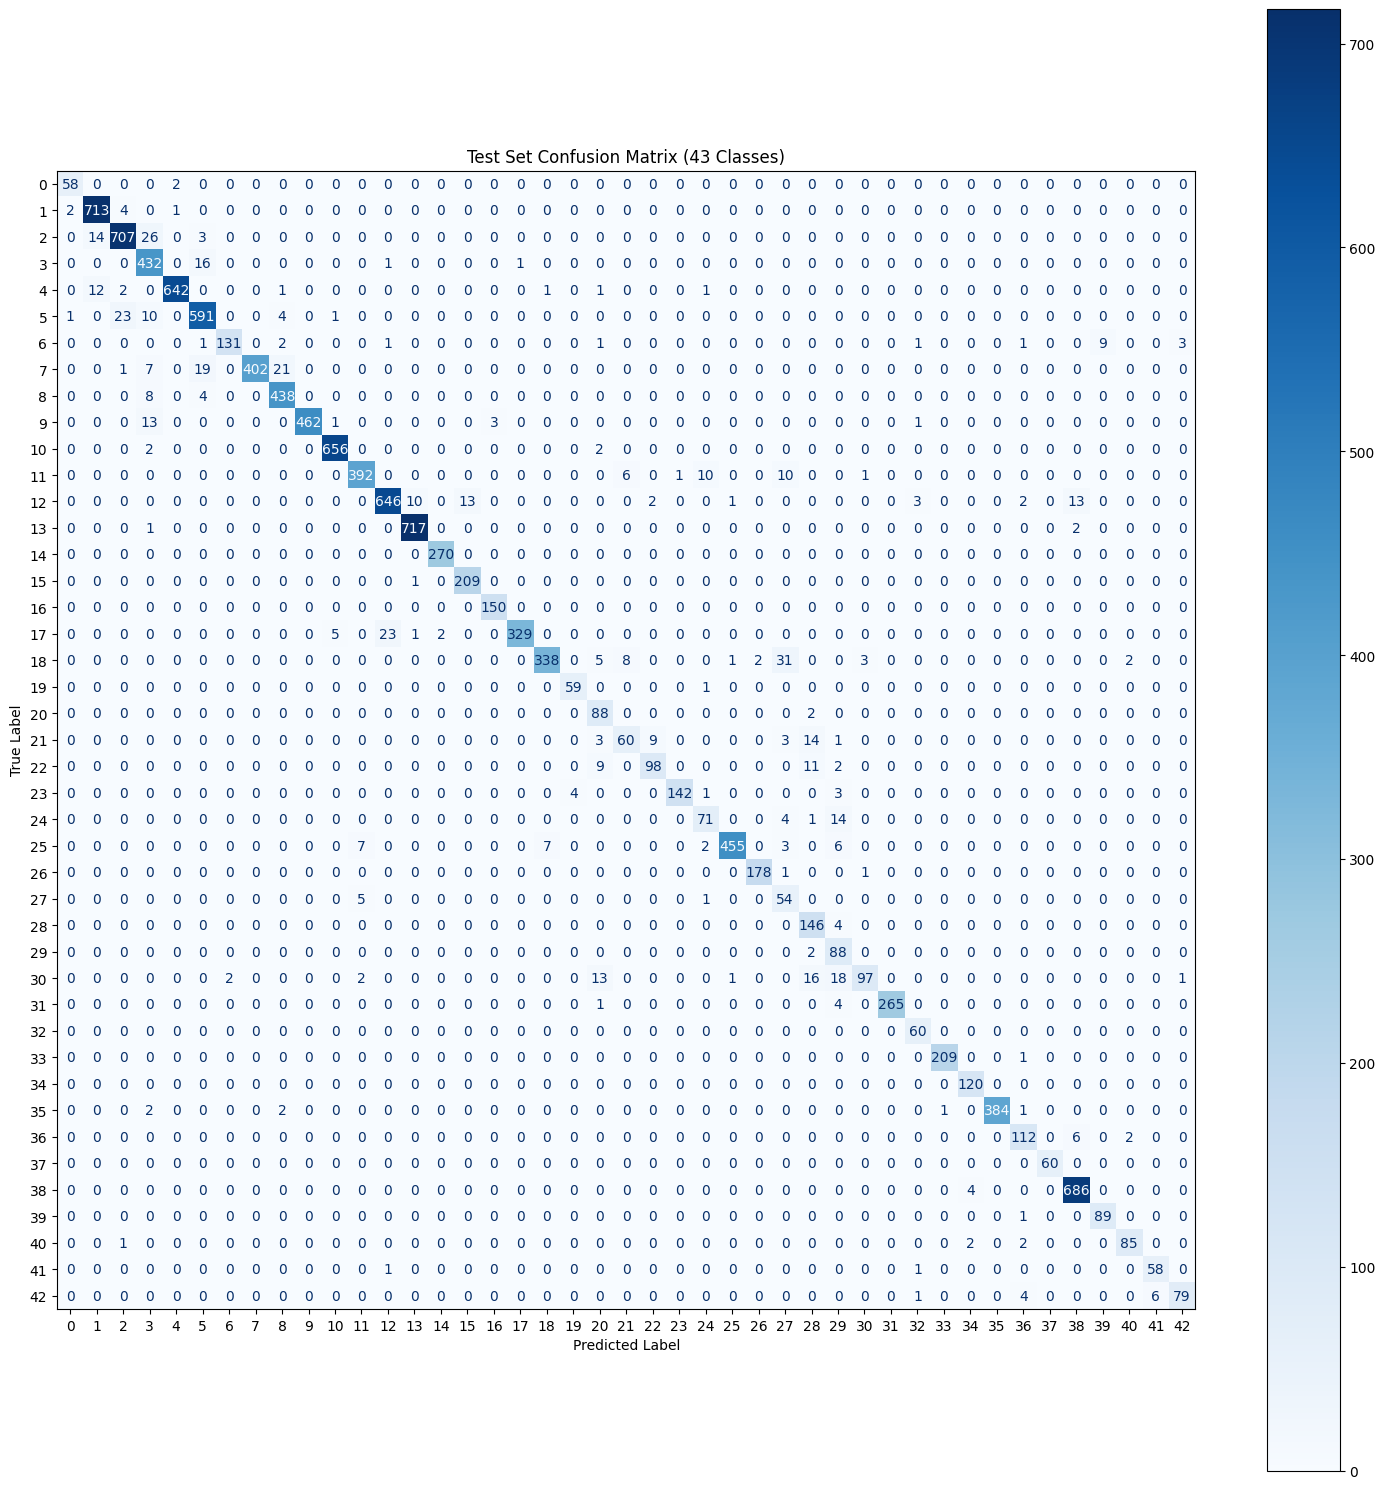

In [28]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image

test_csv_path = os.path.join(cur_path, 'Test.csv')
y_test = pd.read_csv(test_csv_path)

labels = y_test["ClassId"].values
imgs_relative_paths = y_test["Path"].values

data=[]


for img_rel_path in imgs_relative_paths:

    full_img_path = os.path.join(cur_path, img_rel_path.replace('gtsrb-german-traffic-sign/', ''))

    try:
        image = Image.open(full_img_path)
        image = image.resize((30,30))
        data.append(np.array(image))
    except FileNotFoundError:
        print(f"File not found: {full_img_path}")
        continue

X_test=np.array(data)

# Normalize X_test
X_test = X_test / 255.0


pred = np.argmax(model.predict(X_test), axis=-1)

true_labels = labels[:len(pred)]
overall_accuracy = accuracy_score(true_labels, pred)
print(f"Overall Test Accuracy: {overall_accuracy:.4f}")

#Calculate the Confusion Matrix
cm = confusion_matrix(true_labels, pred)

#Plot the matrix (set large size for 43 classes)
fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
ax.set_title('Test Set Confusion Matrix (43 Classes)')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.tight_layout()
plt.savefig('test_confusion_matrix.png') # Save the plot
plt.show()

#### Here we are testing our model on our saved model also we can test on our 15 epoch data result we got.

In [29]:
import os

model_storage_path = "./"

model_filename = 'my_model2.h5'
model_path = os.path.join(model_storage_path, model_filename)
model.save(model_path)
print(f"Model saved successfully at: {os.path.abspath(model_path)}")

Model saved successfully at: /content/my_model2.h5


In [30]:
from keras.models import load_model

try:
    model = load_model(model_path)
    print(f"Model loaded successfully from: {model_path}")
except Exception as e:
    print(f"Error loading model from Drive: {e}")

Model loaded successfully from: ./my_model2.h5


Saving images.jpg to images (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
images (1).jpg, Speed limit (120km/h)


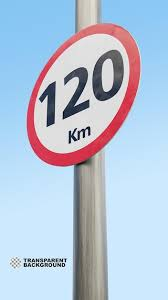

In [ ]:
# Test with random image
import numpy as np
from google.colab import files
# Use the standard TensorFlow/Keras preprocessing utilities
from tensorflow.keras.preprocessing.image import load_img, img_to_array   # pyright: ignore[reportMissingImports]
from IPython.display import Image, display

# This command opens the file selection window for manual upload
uploaded = files.upload()

for fn in uploaded.keys():
    # In Colab, uploaded files are typically accessible by their name in the root folder
    path = fn

    # 1. Load and preprocess image
    img = load_img(path, target_size = (30,30)) # load the image and resize
    x = img_to_array(img)

    # 2. Prepare for prediction
    x = np.expand_dims(x, axis=0) # Add batch dimension
    # CRITICAL FIX: Normalize the image data (must match training data normalization)
    images = x / 255.0

    # 3. Predict the label
    value = classes = np.argmax(model.predict(images, batch_size=32), axis=-1)

    # 4. Output Logic
    if classes[0]==0:
        print(fn + ', Speed limit (20km/h)'), display(Image(fn)) #print the content

    elif classes[0]==1:
        print(fn + ', Speed limit (30km/h)'), display(Image(fn)) #print the content

    elif classes[0]==2:
        print(fn + ', Speed limit (50km/h)'), display(Image(fn)) #print the content

    elif classes[0]==3:
        print(fn + ', Speed limit (60km/h)'), display(Image(fn)) #print the content

    elif classes[0]==4:
        print(fn + ', Speed limit (70km/h)'), display(Image(fn)) #print the content

    elif classes[0]==5:
        print(fn + ', Speed limit (80km/h)'), display(Image(fn)) #print the content

    elif classes[0]==6:
        print(fn + ', End of speed limit (80km/h)'), display(Image(fn)) #print the content

    elif classes[0]==7:
        print(fn + ', Speed limit (100km/h)'), display(Image(fn)) #print the content

    elif classes[0]==8:
        print(fn + ', Speed limit (120km/h)'), display(Image(fn)) #print the content

    elif classes[0]==9:
        print(fn + ', No passing'), display(Image(fn)) #print the content

    elif classes[0]==10:
        print(fn + ', No passing veh over 3.5 tons'), display(Image(fn)) #print the content

    elif classes[0]==11:
        print(fn + ', Right-of-way at intersection'), display(Image(fn)) #print the content

    elif classes[0]==12:
        print(fn + ', Priority road'), display(Image(fn)) #print the content

    elif classes[0]==13:
        print(fn + ', Yield'), display(Image(fn)) #print the content

    elif classes[0]==14:
        print(fn + ', Stop'), display(Image(fn)) #print the content

    elif classes[0]==15:
        print(fn + ', No vehicles'), display(Image(fn)) #print the content

    elif classes[0]==16:
        print(fn + ', Veh > 3.5 tons prohibited'), display(Image(fn)) #print the content

    elif classes[0]==17:
        print(fn + ', No entry'), display(Image(fn)) #print the content

    elif classes[0]==18:
        print(fn + ', General caution'), display(Image(fn)) #print the content

    elif classes[0]==19:
        print(fn + ', Dangerous curve left'), display(Image(fn)) #print the content

    elif classes[0]==20:
        print(fn + ', Dangerous curve right'), display(Image(fn)) #print the content

    elif classes[0]==21:
        print(fn + ', Double curve'), display(Image(fn)) #print the content

    elif classes[0]==22:
        print(fn + ', Bumpy road'), display(Image(fn)) #print the content

    elif classes[0]==23:
        print(fn + ', Slippery road'), display(Image(fn)) #print the content

    elif classes[0]==24:
        print(fn + ', Road narrows on the right'), display(Image(fn)) #print the content

    elif classes[0]==25:
        print(fn + ', Road work'), display(Image(fn)) #print the content

    elif classes[0]==26:
        print(fn + ', Traffic signals'), display(Image(fn)) #print the content

    elif classes[0]==27:
        print(fn + ', Pedestrians'), display(Image(fn)) #print the content

    elif classes[0]==28:
        print(fn + ', Children crossing'), display(Image(fn)) #print the content

    elif classes[0]==29:
        print(fn + ', Bicycles crossing'), display(Image(fn)) #print the content

    elif classes[0]==30:
        print(fn + ', Beware of ice/snow'), display(Image(fn)) #print the content

    elif classes[0]==31:
        print(fn + ', Wild animals crossing'), display(Image(fn)) #print the content

    elif classes[0]==32:
        print(fn + ', End speed + passing limits'), display(Image(fn)) #print the content

    elif classes[0]==33:
        print(fn + ', Turn right ahead'), display(Image(fn)) #print the content

    elif classes[0]==34:
        print(fn + ', Turn left ahead'), display(Image(fn)) #print the content

    elif classes[0]==35:
        print(fn + ', Ahead only'), display(Image(fn)) #print the content

    elif classes[0]==36:
        print(fn + ', Go straight or right'), display(Image(fn)) #print the content

    elif classes[0]==37:
        print(fn + ', Go straight or left'), display(Image(fn)) #print the content

    elif classes[0]==38:
        print(fn + ', Keep right'), display(Image(fn)) #print the content

    elif classes[0]==39:
        print(fn + ', Keep left'), display(Image(fn)) #print the content

    elif classes[0]==40:
        print(fn + ', Roundabout mandatory'), display(Image(fn)) #print the content

    elif classes[0]==41:
        print(fn + ', End of no passing'), display(Image(fn)) #print the content

    else:
        print(fn + ', End no passing veh > 3.5 tons'), display(Image(fn)) #print the content